In [ ]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
# สำหรับคนที่ยังไม่ได้ลงไลบรารี่ fastbook ให้ uncomment บรรทัด !pip install
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.7 MB/s 
     |████████████████████████████████| 4.2 MB 8.9 MB/s 
     |████████████████████████████████| 346 kB 50.5 MB/s 
     |████████████████████████████████| 1.2 MB 55.3 MB/s 
     |████████████████████████████████| 197 kB 42.2 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 140 kB 69.3 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 43.6 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 212 kB 66.1 MB/s 
     |████████████████████████████████| 596 kB 64.1 MB/s 
     |████████████████████████████████| 127 kB 65.6 MB/s 
     |████████████████████████████████| 271 kB 65.4 MB/s 
     |████████████████████████████████| 144 kB 71.6 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 112 kB 63.2 MB/s 
     |██████████████████

In [ ]:
from fastbook import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # GrandparentSplitter(valid_name='validation')
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = fields.dataloaders("/content/gdrive/MyDrive/dataset/good_or_bad/train")

In [ ]:
dls.vocab

['bad', 'good']

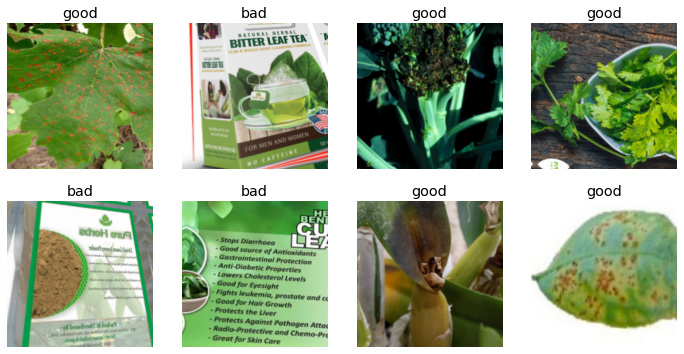

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learner = cnn_learner(dls, models.vgg16_bn, metrics=[error_rate, accuracy, F1Score(), Precision(), Recall()], opt_func=Adam)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0020892962347716093)

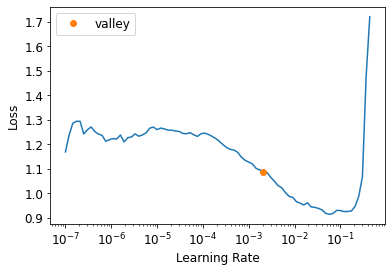

In [ ]:
learner.lr_find() # หา learning rate ที่เหมาะสม

In [ ]:
learner.fine_tune(epochs=30, freeze_epochs=1, base_lr=0.002)

epoch,train_loss,valid_loss,error_rate,accuracy,f1_score,precision_score,recall_score,time
0,0.867392,0.409575,0.181818,0.818182,0.828221,0.789474,0.870968,00:57


epoch,train_loss,valid_loss,error_rate,accuracy,f1_score,precision_score,recall_score,time
0,0.549866,0.424760,0.181818,0.818182,0.825000,0.800000,0.851613,00:45
1,0.491683,0.424165,0.159091,0.840909,0.844444,0.831250,0.858065,00:45
2,0.435472,0.419711,0.175325,0.824675,0.820000,0.848276,0.793548,00:44
3,0.377425,0.373833,0.149351,0.850649,0.853503,0.842767,0.864516,00:45
4,0.345819,0.419942,0.152597,0.847403,0.842809,0.875000,0.812903,00:46
5,0.308773,0.438063,0.149351,0.850649,0.847682,0.870748,0.825806,00:47
6,0.272251,0.454042,0.142857,0.857143,0.849315,0.905109,0.800000,00:46
7,0.237463,0.451612,0.155844,0.844156,0.840000,0.868966,0.812903,00:48
8,0.204756,0.550114,0.172078,0.827922,0.810036,0.911290,0.729032,00:48
9,0.176362,0.507367,0.152597,0.847403,0.841751,0.880282,0.806452,00:46


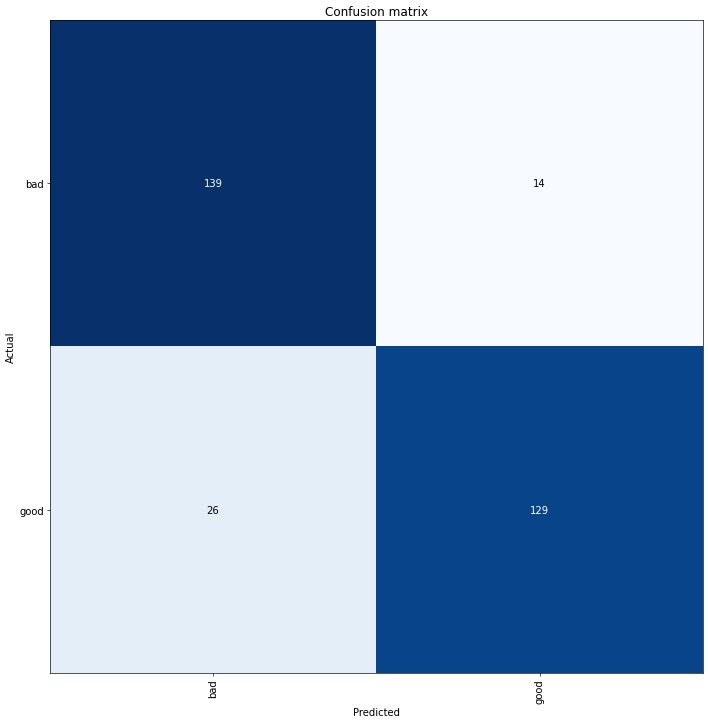

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

         bad       0.84      0.91      0.87       153
        good       0.90      0.83      0.87       155

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



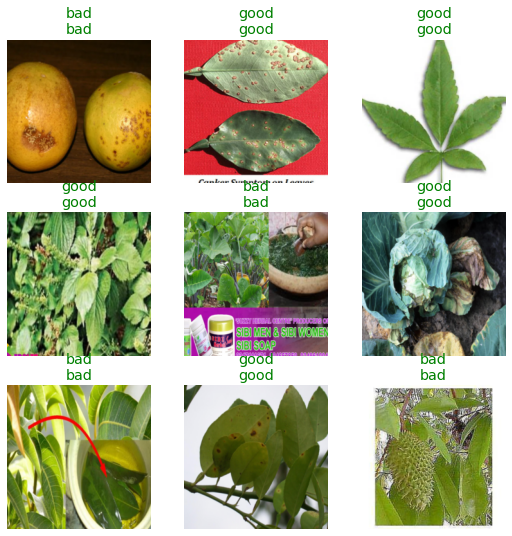

In [ ]:
learner.show_results(shuffle=True)

In [ ]:
learner.export("/content/gdrive/MyDrive/dataset/clean_data.pkl")

In [ ]:
!pip install fastbook
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score
  
learn_inf = load_learner('/content/gdrive/MyDrive/dataset/data_model.pkl')